# Logistic Regression

In [1]:
# Using the HR data predict an employee is leaving or not

In [158]:
import pandas as pd # Importing pandas library to perform operation on dataframe
import matplotlib.pyplot as plt # Importing matplotlib to visualise data points
%matplotlib inline

In [159]:
data = pd.read_csv('C:\\users\\sameer\\Desktop\\Datasets\\hrdata.csv') # Importing dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [160]:
data.describe() # Statistical information about the variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [161]:
data.info() # Checking data type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [162]:
# dividing the dataframe into those who left and those who retained
left = data[data.left==0]
left.shape

(11428, 10)

In [163]:
not_left = data[data.left==1]
not_left.shape

(3571, 10)

In [164]:
# Average number of all columns
data.groupby(data.left).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [165]:
# Satisfaction level, average monthly hours seems to be little impactful and promotion seems to be bigger

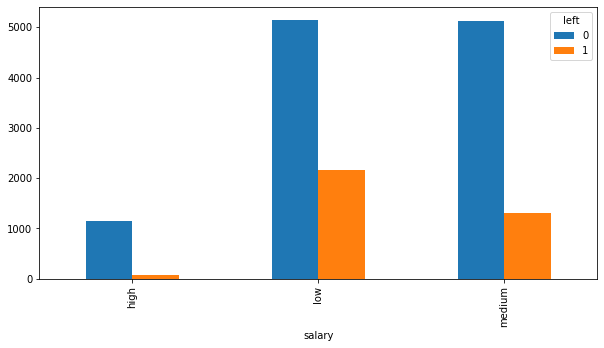

In [166]:
# Impact of salary on employee retention
pd.crosstab(data.salary,data.left).plot(kind = 'bar',figsize = (10,5))

In [167]:
# graph shows high salaries are not likely to leave company

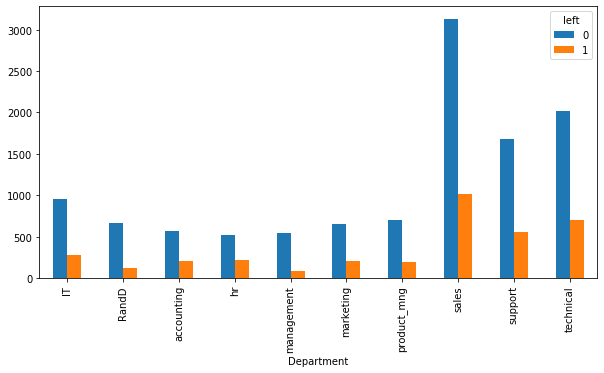

In [168]:
# impact of department on employee retention
pd.crosstab(data.Department,data.left).plot(kind = 'bar',figsize = (10,5))

In [169]:
# graph show some impact of departments but not majorly, so ignore

In [170]:
# From exploratory data analysis we can conclude independent variables as 
# Satisfaction level
# Average working hours
# Promotion
# Salary

In [171]:
sub_data = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sub_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [172]:
# tackle salary dummy variable
sal = pd.get_dummies(sub_data.salary,prefix='salary')
sal.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [173]:
new_data = pd.concat([sub_data,sal],axis = 'columns') # concat the dummy variable and original dataframes
new_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [174]:
new_data.drop('salary',inplace = True,axis = 'columns') # droping 'salary' column after encoding the text data

In [175]:
new_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [176]:
X = new_data # Independent variables datframe

In [177]:
y = data.left # Dependent Variable

In [178]:
from sklearn.model_selection import train_test_split # Importing train-test split from sklearn

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [180]:
from sklearn.linear_model import LogisticRegression # Importing logistic regression model

In [185]:
model = LogisticRegression(solver = 'liblinear')

In [186]:
model_fit = model.fit(X_train,y_train) # fitting the model

In [187]:
model_fit.predict(X_test) # predicting the values of 'y' on 'X_test'

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [188]:
model_fit.score(X_test,y_test) # model score

0.7786666666666666